Load and Inspect the Datasets

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 

In [30]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def pick_random_images(dataset_path, num_images):
    """
    Randomly select a specified number of images from a dataset folder.

    Args:
        dataset_path (str): Path to the dataset directory.
        num_images (int): Number of images to randomly pick.

    Returns:
        list: List of randomly picked image file paths.
    """
    # Get all image file paths in the dataset directory
    image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Check if the requested number of images is valid
    if num_images > len(image_files):
        raise ValueError(f"The dataset contains only {len(image_files)} images, but {num_images} were requested.")
    
    # Randomly select the specified number of images
    selected_files = random.sample(image_files, num_images)
    
    return selected_files

# Example usage:
# Define dataset paths


# Load and di



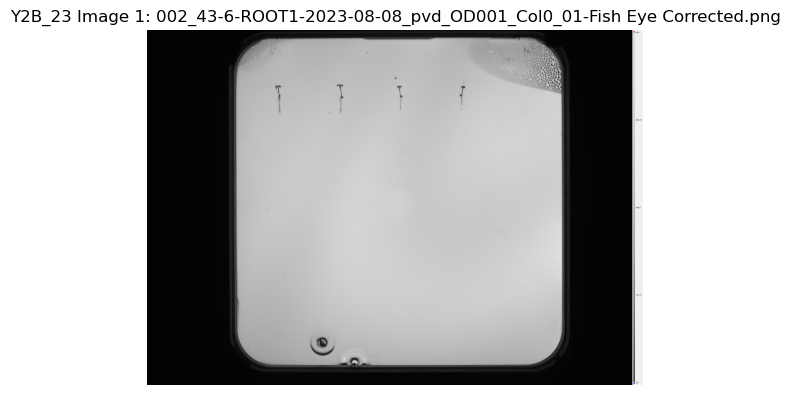

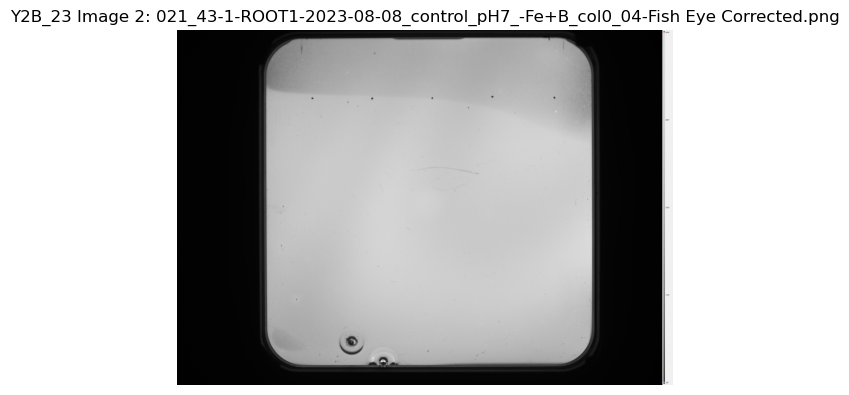

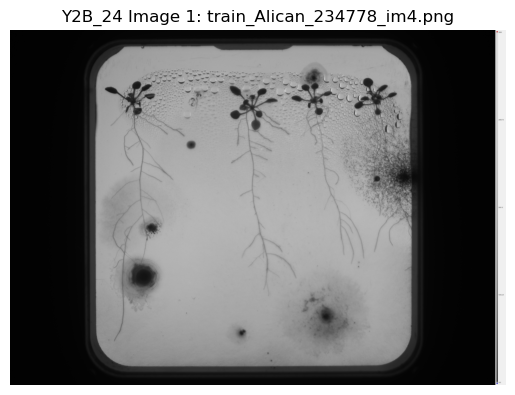

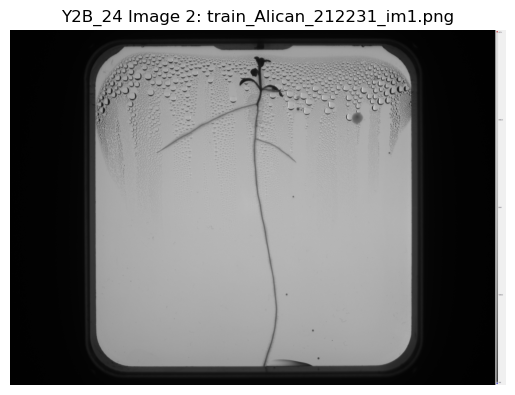

In [31]:
y2b_23_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_23/images/train"
y2b_24_path = "D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_24/images"

num_images_to_pick = 2

# Get random image file paths
y2b_23_files = pick_random_images(y2b_23_path, num_images_to_pick)
y2b_24_files = pick_random_images(y2b_24_path, num_images_to_pick)

# Load and display the images
for i, file_path in enumerate(y2b_23_files):
    img = cv2.imread(file_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Y2B_23 Image {i+1}: {os.path.basename(file_path)}")
    plt.axis('off')
    plt.show()

for i, file_path in enumerate(y2b_24_files):
    img = cv2.imread(file_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Y2B_24 Image {i+1}: {os.path.basename(file_path)}")
    plt.axis('off')
    plt.show()

In [2]:
def crop_petri_dish_directly(image):
    """
    Crop the Petri dish directly from the image by removing white edges.
    
    Args:
        - image (ndarray): Original image in BGR format.
    
    Returns:
        - cropped_image (ndarray): Cropped Petri dish image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold to create a binary mask
    _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # Invert for non-white regions
    
    # Find contours to detect the Petri dish boundary
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour, assumed to be the Petri dish
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Ensure square crop by taking the maximum dimension
    size = max(w, h)
    center_x, center_y = x + w // 2, y + h // 2
    
    # Calculate square coordinates
    x_start = max(center_x - size // 2, 0)
    y_start = max(center_y - size // 2, 0)
    x_end = x_start + size
    y_end = y_start + size
    
    # Crop and return
    cropped_image = image[y_start:y_end, x_start:x_end]
    return cropped_image


In [3]:
def process_and_crop_images(dataset_path, output_folder="cropped_images"):
    """
    Process all images in the dataset folder and crop them directly.
    
    Args:
        - dataset_path (str): Path to the dataset folder.
        - output_folder (str): Folder to save cropped images.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    for file_name in os.listdir(dataset_path):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(dataset_path, file_name)
            image = cv2.imread(file_path)
            
            # Crop Petri dish
            cropped_image = crop_petri_dish_directly(image)
            
            # Save the cropped image
            output_path = os.path.join(output_folder, file_name)
            cv2.imwrite(output_path, cropped_image)
            print(f"Saved cropped image: {output_path}")


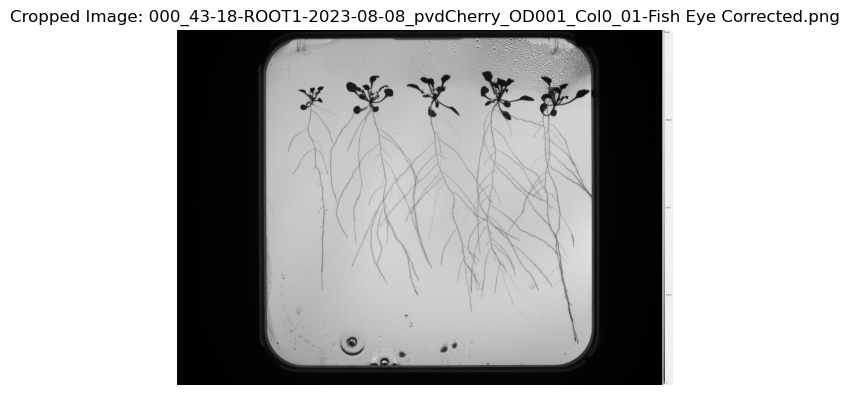

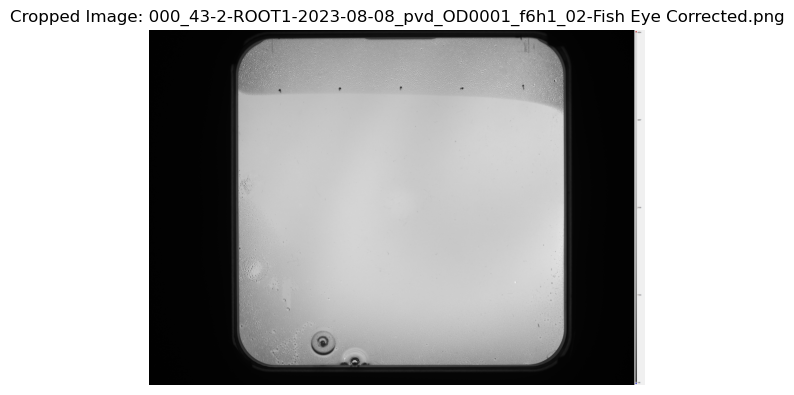

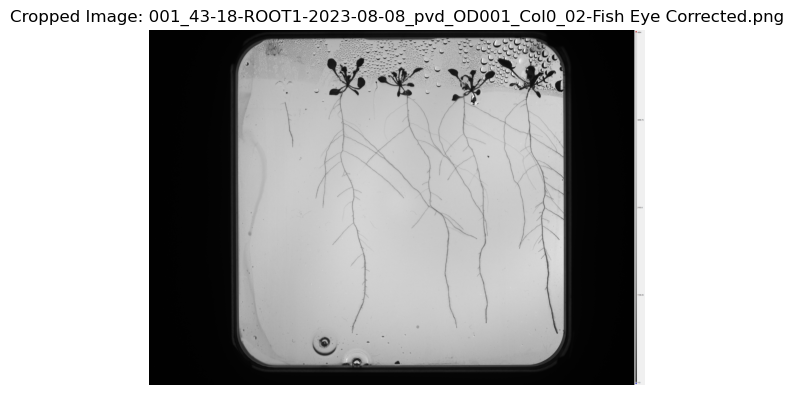

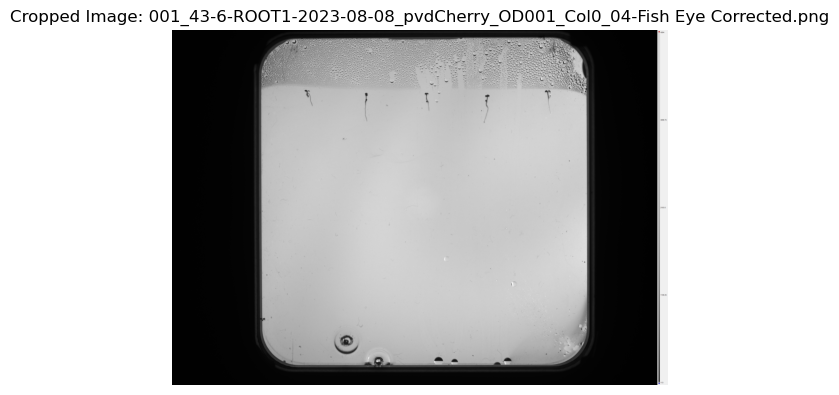

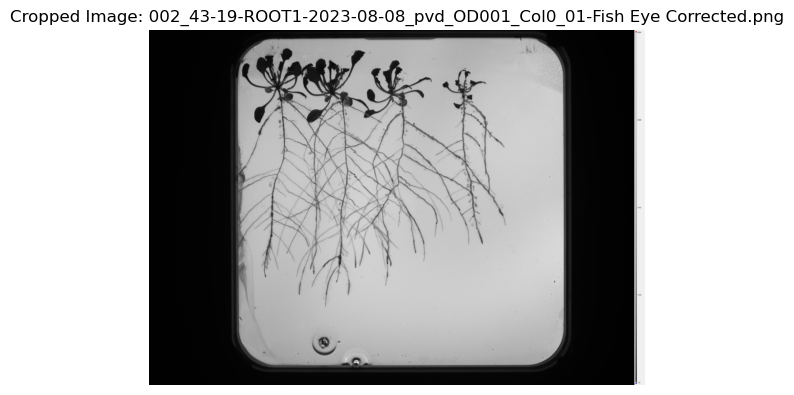

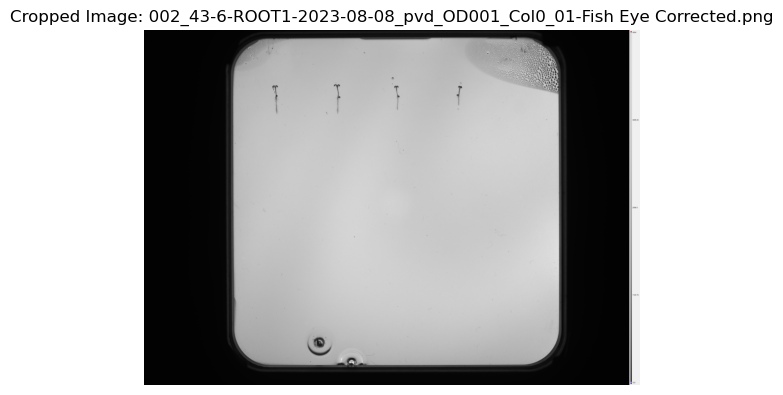

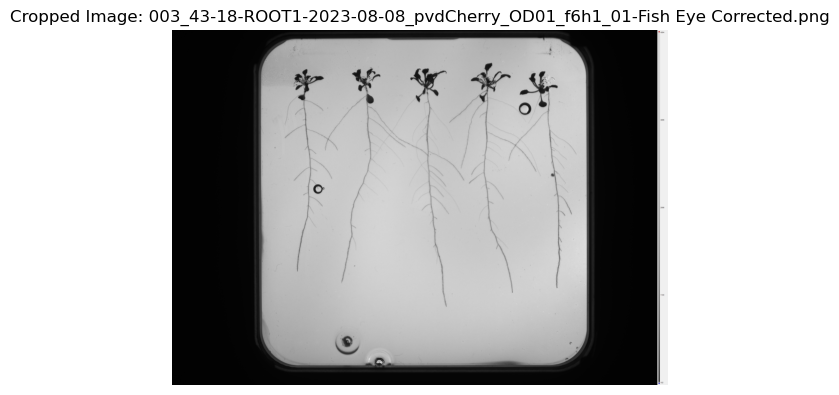

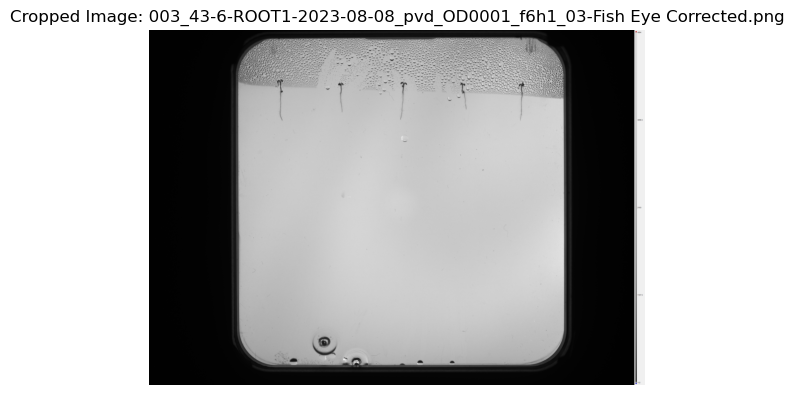

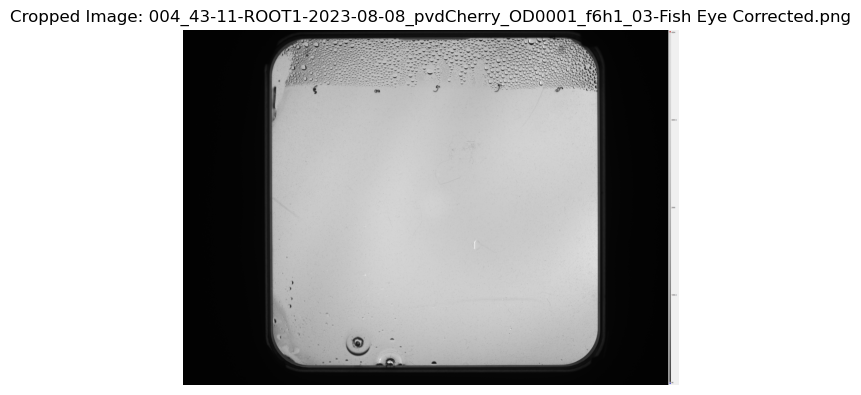

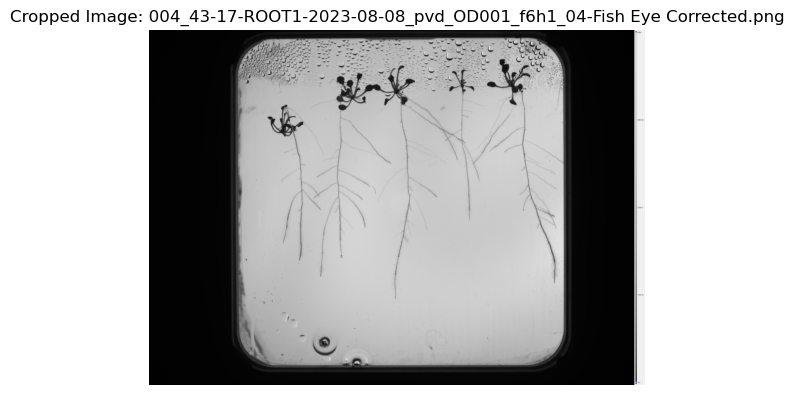

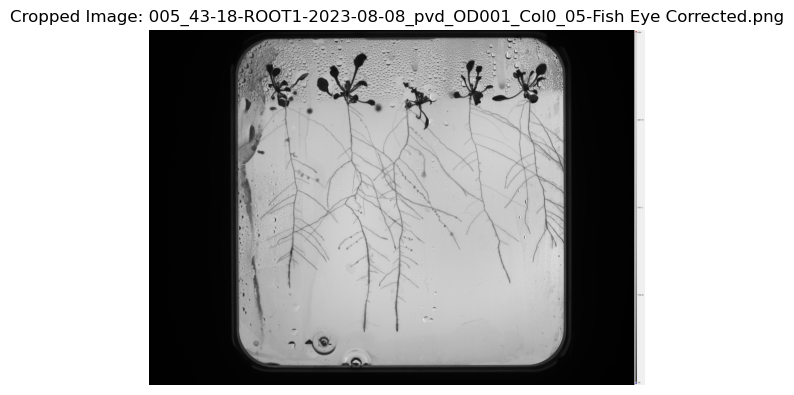

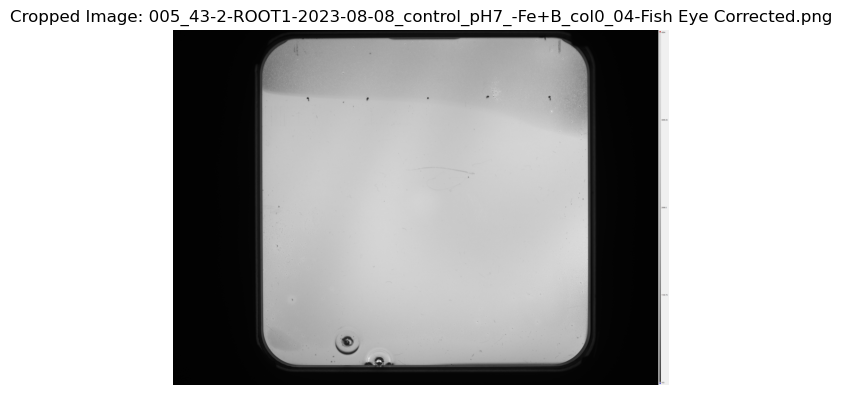

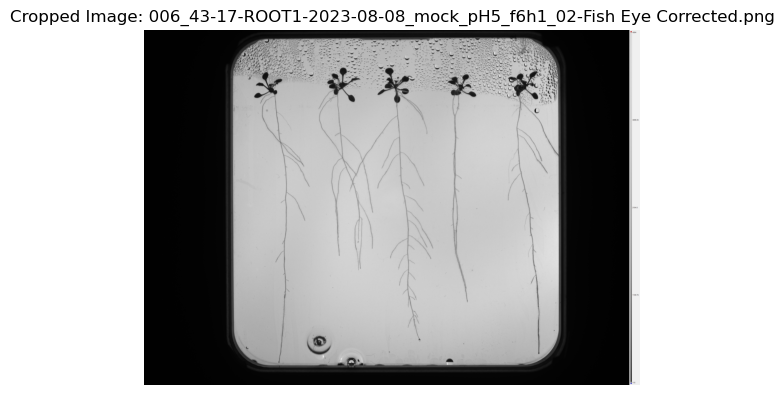

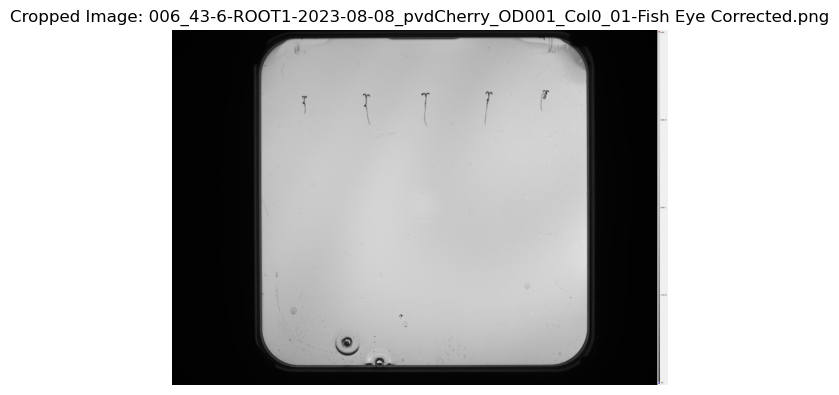

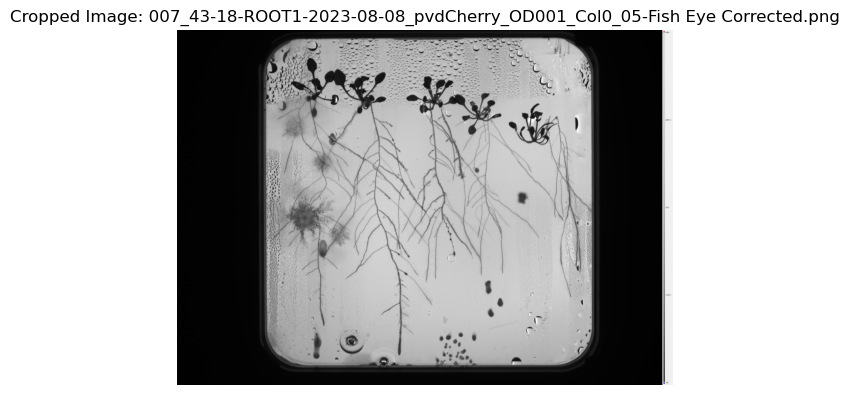

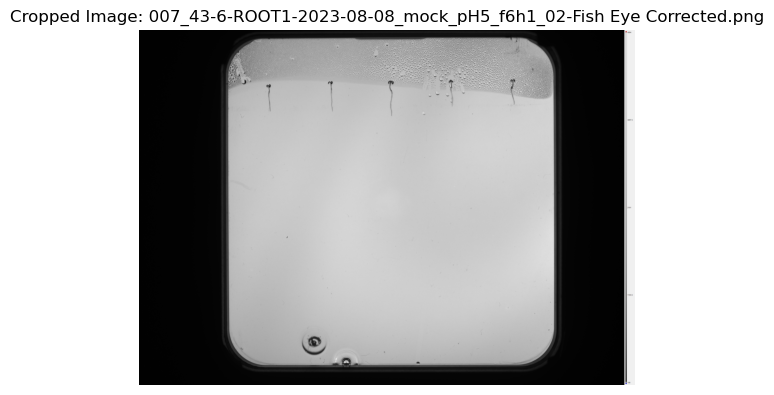

KeyboardInterrupt: 

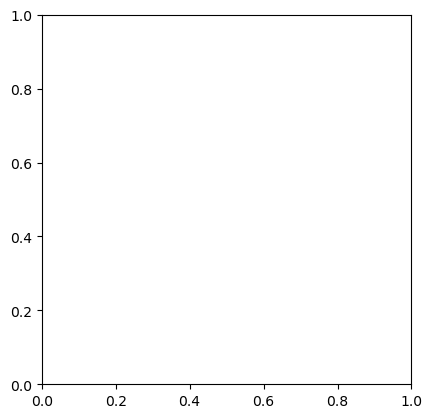

In [8]:
display_cropped_images("D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_23/images/train")

In [53]:
process_limited_dataset("D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_23/images/train", max_images=2)
process_limited_dataset("D:/Holland_Year_2/Block_B/2024-25b-fai2-adsai-PetarPaskalev232725/Y2B_24/images", max_images=2)


Saved cropped image: cropped_images\000_43-18-ROOT1-2023-08-08_pvdCherry_OD001_Col0_01-Fish Eye Corrected.png
Saved cropped image: cropped_images\000_43-2-ROOT1-2023-08-08_pvd_OD0001_f6h1_02-Fish Eye Corrected.png
Saved cropped image: cropped_images\train_Alican_212231_im1.png
No Petri dish detected in: train_Alican_212231_im2.png
No Petri dish detected in: train_Alican_212231_im3.png
Saved cropped image: cropped_images\train_Alican_212231_im4.png
